# Data exploration

## Packages import

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%pip install squarify
import squarify
#%pip install plotly
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
#Setting seed
np.random.seed(123)

In [45]:
#Reading data
df = pd.read_csv("bank_marketing_weka_dataset.csv")

In [46]:
#Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   int64  
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 600.6+ KB


No missing values. Variables are both categorical strings and
continuous numerical.

In [47]:
#Basic information
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Continuous variables

In [48]:
# Funkcja to draw histogram and boxplot
def plot_var(col, variable):
    plot = sns.distplot(col, hist = True, kde = True)
    plot.set_title("Variable distribution: " + variable)
    
    fig, ax = plt.subplots()
    ax.set_title("Variable: " + variable)
    ax.boxplot(col, vert = False)

## Age

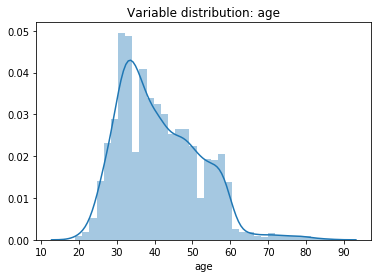

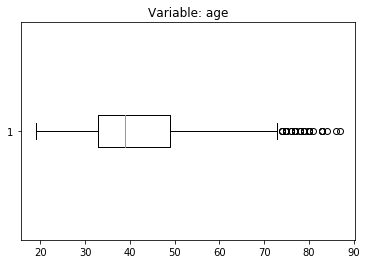

In [49]:
plot_var(df.age, "age")

Skewed distribution, most clients in middle age (30-40). Few clients older than 60 years.

## Balance: Average yearly balance in Euro

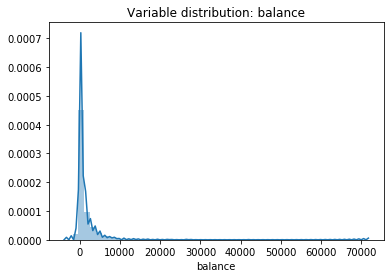

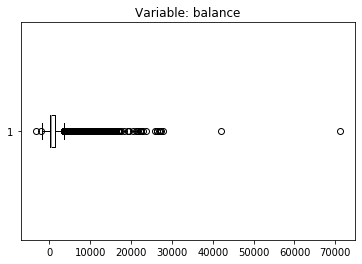

In [50]:
plot_var(df.balance, "balance")

Very heavy tail of distribution. Let's examine the distribution of balances up to 10,000 euros.

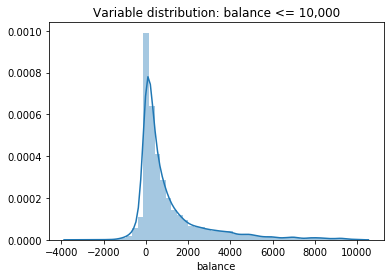

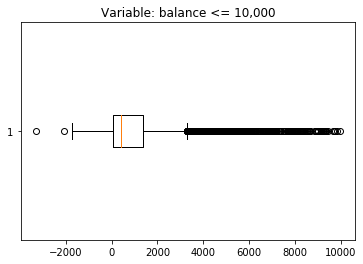

In [51]:
plot_var(df.balance[df.balance <= 10000], "balance <= 10,000")

In [52]:
df_under_10000 = df[df.balance <= 10000]
#Percentage of customers with balance below 10,000 euros
per_under_10000 = len(df_under_10000.index)/len(df.index)
print(per_under_10000*100)

97.96505197965053


Customers with avareage yearly balance under 10,000 euro are almost 98% of whole group.

## Duration: Last contact duration [seconds]

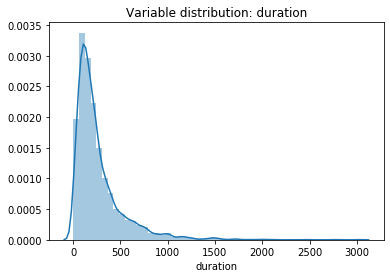

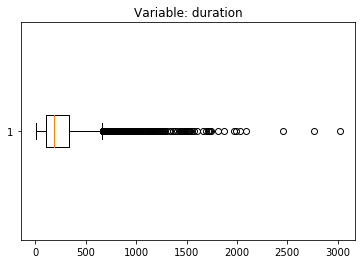

In [53]:
plot_var(df.duration, "duration")

Skewed distribution with tail of last contacts longer than 500s.

## Campaign: Number of contacts made

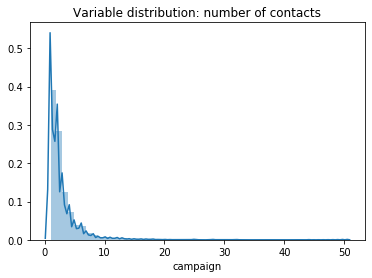

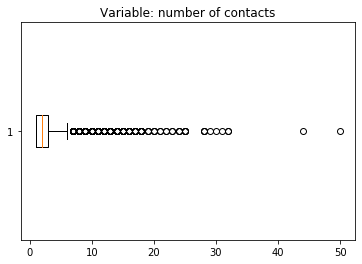

In [54]:
plot_var(df.campaign, "number of contacts")

Again skewed distribution, most clients have less than 10 contacts.

## Pdays: Number of days passed since client was last contacted from a previous campaign

In [55]:
# -1 value means client was not contacted
plot_var(df.pdays, "days from previous contact")

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

Distribution for clients contacted at least once.

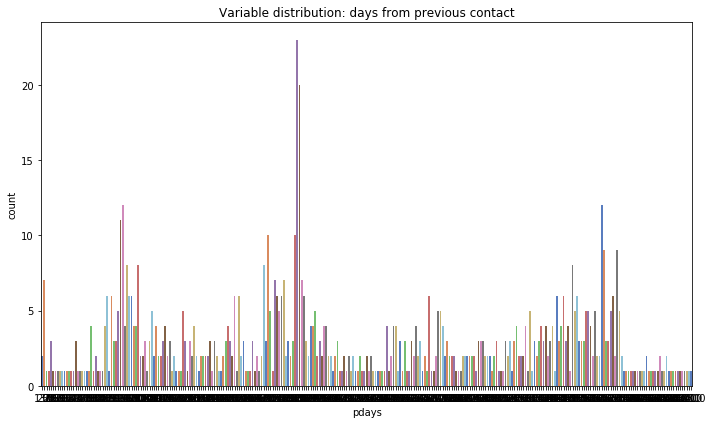

In [72]:
contacted_clients = df[df.pdays >= 0]
plot_var(contacted_clients.pdays, "days from previous contact")

Distribution seems to be bimodal, let's check it better after throwing out outliers.

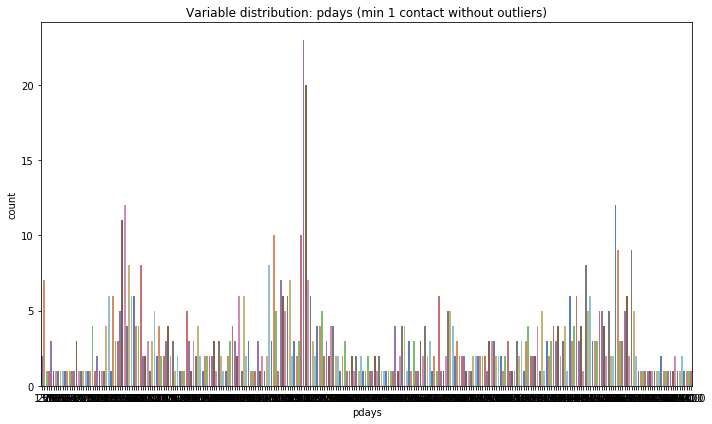

In [73]:
plot_var(contacted_clients.pdays[contacted_clients.pdays<=600],"pdays (min 1 contact without outliers)")

For customers contacted at least once and without group of these who have not been contacted for over 600 days distribution of pday variable is definietly bimodal.

## Previous: Number of contacts performed before this campaign and for this client

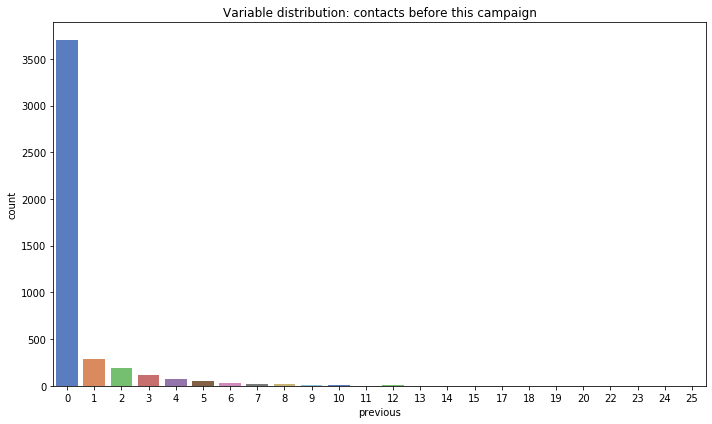

In [74]:
plot_var(df.previous, "contacts before this campaign")

In [75]:
contacted_before = df[df.previous>0]
per_contacted_before = len(contacted_before.index)/len(df.index)
print(per_contacted_before*100)

18.049104180491042


Only 18% of customers were contacted in previous campaigns. That explains mean value for this variable and its distribution.

## Analiza zmiennych kategorycznych

In [76]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [77]:
def plot_var(col, variable,rotation=False,data=df):
    
    plt.figure(figsize=(10,6))
    plot = sns.countplot(x=col, data=data, palette="muted")
    if rotation:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=30, ha="right")
    plot.set_title("Variable distribution: " + variable)
    plt.tight_layout()

 

def plot_var_vs_target(col,variable,rotation=False,data=df):
    x,y = col, 'y'
    data = data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    plot = sns.catplot(data = data, x=x,y='percent',hue=y,kind='bar',height=4, aspect=2,legend_out=False)
    if rotation:
        plot.set_xticklabels(rotation=30)
    plot.fig.suptitle(f'{variable} vs target' ) 
    plt.tight_layout()

def plot_both(column,rotation=False,data=df):
    plot_var(column,column.capitalize(),rotation,data=data)
    plot_var_vs_target(column,column.capitalize(),rotation,data=data)
  

In [78]:
def job_plot():
    '''Quite interesting and interactive presentation of job distribution in dataset which I found on the Internet '''
    x = 0
    y = 0
    width = 100
    height = 100

    job_names = df['job'].value_counts().index
    values = df['job'].value_counts().tolist()

    normed = squarify.normalize_sizes(values, width, height)
    rects = squarify.squarify(normed, x, y, width, height)

    colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
            'rgb(235, 164, 135)','rgb(220, 208, 255)',
            'rgb(253, 253, 150)','rgb(255, 127, 80)', 
            'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
            'rgb(252,64,68)', 'rgb(154,123,91)']

    shapes = []
    annotations = []
    counter = 0

    for r in rects:
        shapes.append(
            dict(
                type = 'rect',
                x0 = r['x'],
                y0 = r['y'],
                x1 = r['x'] + r['dx'],
                y1 = r['y'] + r['dy'],
                line = dict(width=2),
                fillcolor = colors[counter]
            )
        )
        annotations.append(
            dict(
                x = r['x']+(r['dx']/2),
                y = r['y']+(r['dy']/2),
                text = values[counter],
                showarrow = False
            )
        )
        counter = counter + 1
        if counter >= len(colors):
            counter = 0
        
    # For hover text
    trace0 = go.Scatter(
        x = [ r['x']+(r['dx']/2) for r in rects],
        y = [ r['y']+(r['dy']/2) for r in rects],
        text = [ str(v) for v in job_names],
        mode='text',
    )

    layout = dict(
        title='Number of Occupations <br> <i>(From our Sample Population)</i>',
        height=700, 
        width=700,
        xaxis=dict(showgrid=False,zeroline=False),
        yaxis=dict(showgrid=False,zeroline=False),
        shapes=shapes,
        annotations=annotations,
        hovermode='closest'
    )

    # With hovertext
    figure = dict(data=[trace0], layout=layout)

    iplot(figure, filename='squarify-treemap')

## Job

In [91]:
job_plot()

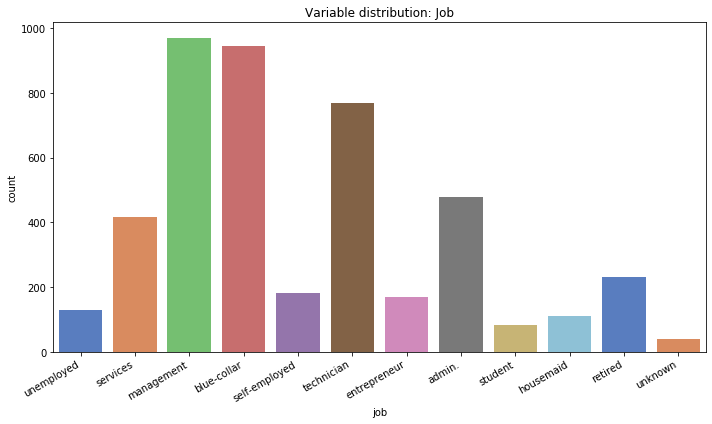

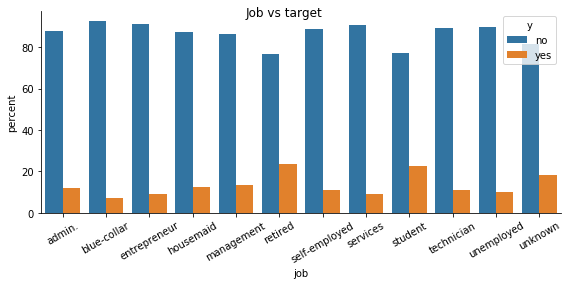

In [92]:
plot_both('job',rotation=True)


The biggest amount of people in out dataset belong to managment or blue-collar group. Also the biggest chances of subscription seems to bea in a retired and student groups which is kinda interesting.

## Marital

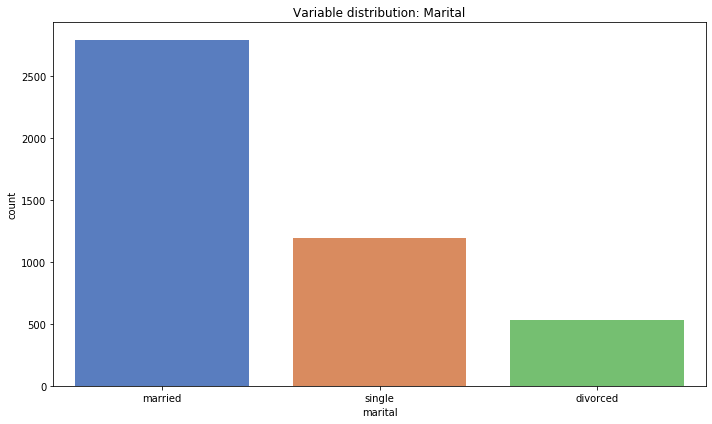

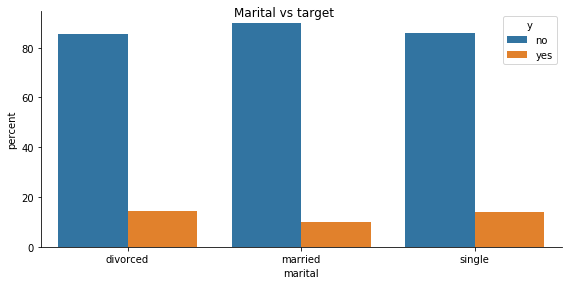

In [93]:
plot_both('marital')

In [94]:
(len(df[df.marital=='married'])/len(df.marital))*100

61.86684361866843

Married people are almost 62% of our data, but there are no visible diffrences in terms of our target amongst groups.

## Education

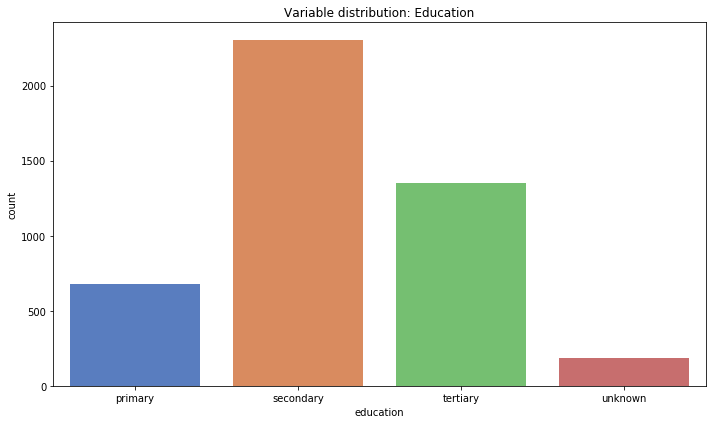

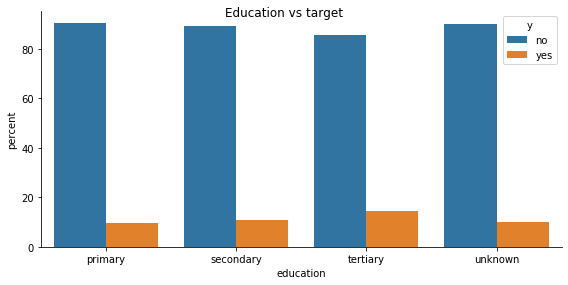

In [95]:
plot_both('education')

A bit higher amount of subscriptions among people with tertiary education may be correlated with a bigger amount of subscriptions among students what we have seen earlier.

## Loans

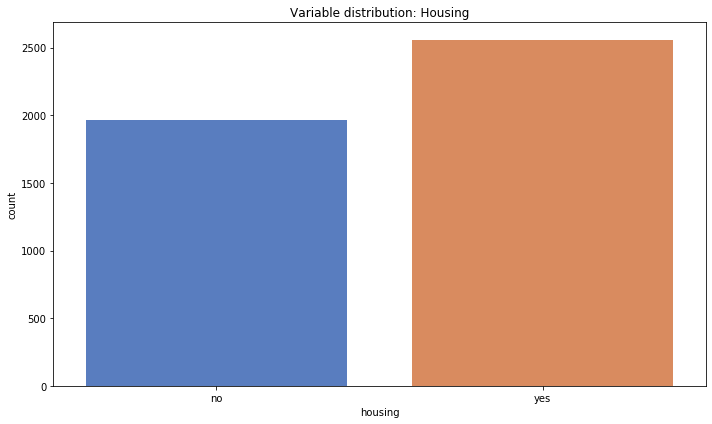

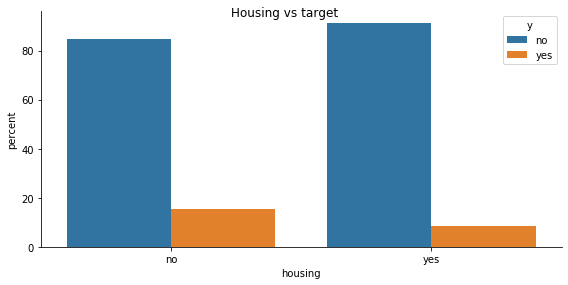

In [96]:
plot_both('housing')

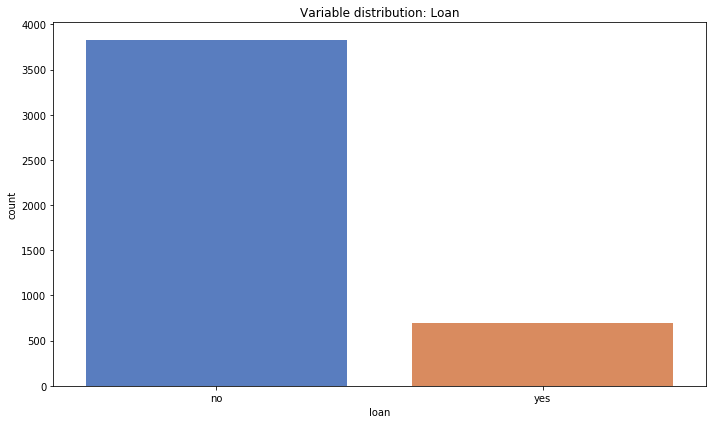

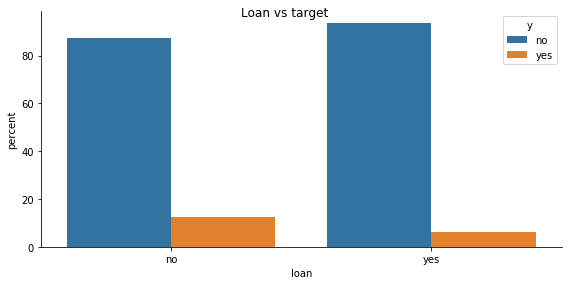

In [97]:
plot_both('loan')

Majority of people have house loan but doesnt have a personal loan. However in both cases the bigger subscription rate is among people who do not have loans. It is certainly worth checking it further.

## Contact

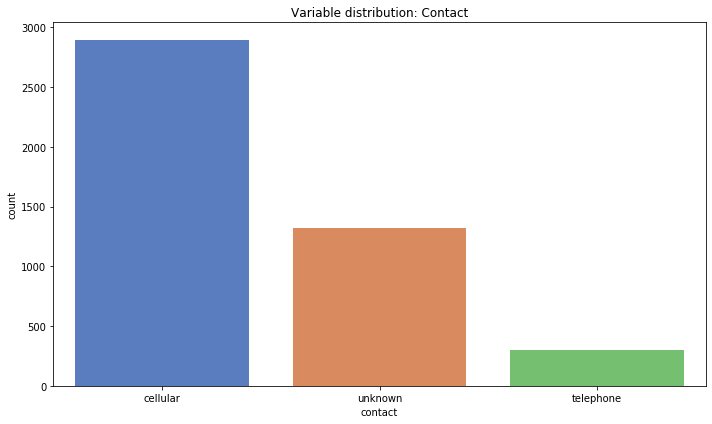

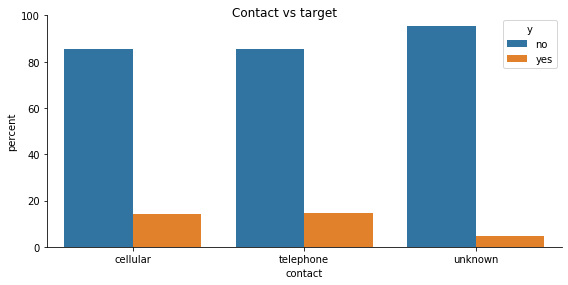

In [98]:
plot_both('contact')

Most of the people have been contaced through the ceullar but it does not seem to have any impact on out target.

## Poutcome (previous outcome)

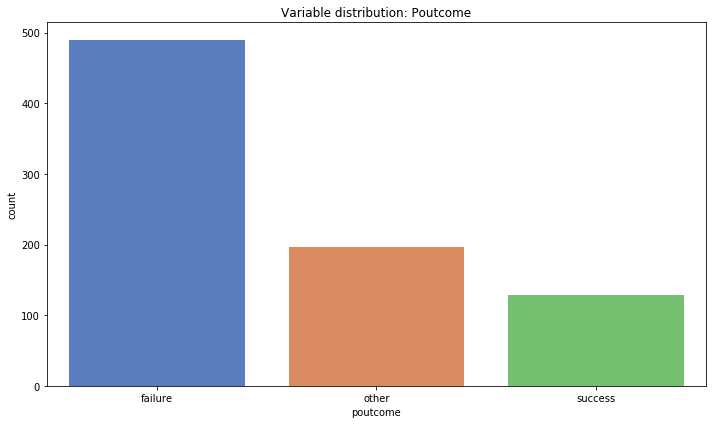

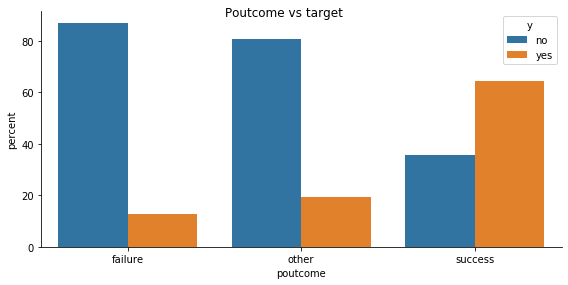

In [99]:
data_help = df[df.poutcome !='unknown']
plot_both('poutcome',data=data_help)

We decided for now to get rid of unknown for that plot, becuase it does not tell to much, but we can se that there is correlation beetwen previous succes in therms of our target and the succes that we want to predict.